# nmi | spring 2024
## homework 05 | interpolation
## your name here


### q1 interpolating function

find polynomial that passes through points $(0,1),(2,3),(3,0)$.
</br>


#### (a) (10 pts) use lagrange interpolation or newtons divided difference.


#### (b) (5 pts) calculate the upper bound for interpolation error at $x=1$.


### q2 chebyshev interpolation

<b><font color=red>this is a code question.</font></b>
</br></br>

find interpolating function $P_{10}(x)$ that approximates $f(x) = e^x$ over the interval $[-1,1]$ with number of data points sampled $n = 11$.
</br></br>

<b>wednesdays lab will include similar workflow for this question. the quick extra credit on blackboard is a basic introduction to plots in python.</b>
</br>


#### common code


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import polynomial as npp
import scipy as sp

# function to approximate
f = lambda x: 1/np.exp(x)
#f = lambda x: 1/(1+12*pow(x,2)) # possible demo function for walk-through ~ dunno yet!
#input = np.array([[-3,0],[-2.5,0],[-2,0],[-1.5,0],[-1,0],[-0.5,0],[0,1],[0.5,0],[1,0],[1.5,0],[2,0],[2.5,0],[3,0]])

# interval
x = [-1,1]


In [ ]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html

def divided_diff(x, y):
  '''
  function to calculate the divided
  differences table
  '''
  n = len(y)
  coef = np.zeros([n, n])
  # the first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):
  '''
  evaluate the newton polynomial
  at x
  '''
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

#coeffs = divided_diff(xn,yn)[0,:]
#ps_std = newton_poly(coeffs,xn,xall)


#### (a) (5 pts) express $P_{10}(x)$ as standard monomial using evenly spaced data points.



In [ ]:
n = 11 # points, including both endpoints
xs_esp = np.linspace(x[0],x[1],n) # evenly spaced
ys_esp = f(xs_esp)

# lol no bc its lsq fit
#p_std = npp.polynomial.Polynomial.fit(xs_esp,ys_esp,deg=n-1)
#c_std = np.array(list(p_std)) # get coeffs
#print(f"\nstandard monomial (lsq): {p_std}") # pretty print

# ndd: not pretty
#c_std = divided_diff(xs_evn,ys_evn)[0,:]
#print(f"\nstandard monomial: {c_std}") # contorted print

# lagrange: meh = goldilocks
p_std = sp.interpolate.lagrange(xs_esp,ys_esp)
print(f"\nstandard monomial:\n\n{p_std}\n") # meh print



standard monomial:

        10             9       8             7         6             5
-95.92 x  + 1.184e-12 x + 219 x + 2.973e-12 x - 175.2 x - 2.028e-13 x
          4             3        2
 + 61.53 x - 4.343e-14 x - 10.3 x - 7.73e-17 x + 1



#### (b) (10 pts) express $P_{10}(x)$ with chebyshev basis using chebyshev nodes.


In [ ]:
xs_rts = npp.chebyshev.chebpts1(n) # chebyshev roots
#xs_rts = npp.chebyshev.chebpts2(n) # chebyshev roots
ys_rts = f(xs_rts) # np.exp(xs) # system ~ truth
print(f"\nchebyshev roots:\n\n{xs_rts}")

p_che = npp.chebyshev.Chebyshev.fit(xs_rts,ys_rts,deg=n-1) # SIGH
print(f"\nchebyshev polynomial:\n\n{p_che}\n") # pretty print



chebyshev roots:

[-0.98982144 -0.909632   -0.75574957 -0.54064082 -0.28173256  0.
  0.28173256  0.54064082  0.75574957  0.909632    0.98982144]

chebyshev polynomial:

0.28294791 + (2.92863845e-17)·T₁(x) - 0.31363751·T₂(x) -
(4.12603335e-17)·T₃(x) + 0.18487843·T₄(x) - (1.07749981e-17)·T₅(x) -
0.10164182·T₆(x) + (6.70650749e-17)·T₇(x) + 0.07136796·T₈(x) -
(5.29925452e-18)·T₉(x) - 0.04552637·T₁₀(x)



#### (c) (5 pts) calculate error bound at $x=0.9$.


<font color=orange>no need to code! you could write a wee script but why not do it by hand?</font>
</br>


#### (d) (10 pts) calculate computational error for both methods at $x=0.9$.


In [ ]:
x_check = 0.9
f_check = f(x_check) # system ~ truth

p_check_std = np.polyval(p_std,x_check)
print(f"\nstandard monomial, P({p_check_std})= {p_check_std}, error = {abs(f_check-p_check_std)}")

c_che = np.array(list(p_che)) # get coeffs
p_check_che = npp.chebyshev.chebval(x_check,c_che)
print(f"\nchebyshev, P({p_check_che})= {p_check_che}, error = {abs(f_check-p_check_che)}")



standard monomial, P(0.7259540330684391)= 0.7259540330684391, error = 0.6326704509788869

chebyshev, P(0.08330724641578097)= 0.08330724641578097, error = 0.009976335673771264


#### (e) (10 pts) show and label $f(x),P_{10:std}(x),P_{10:che}(x)$ on same plot.


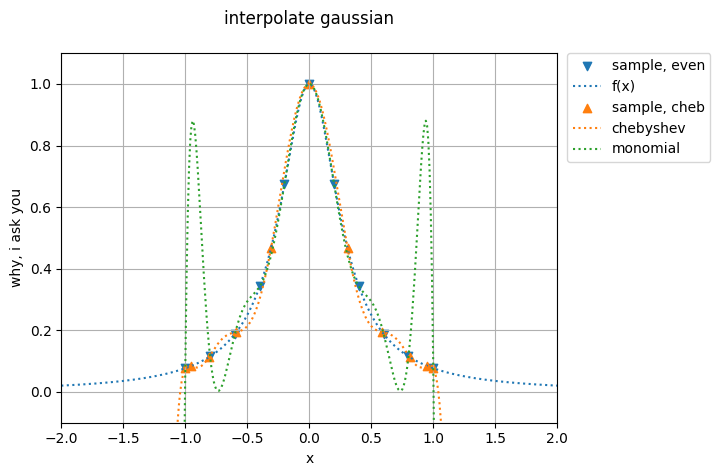

In [ ]:
x_wider = [-2,2]
h = 0.01
xs_moar = np.arange(x_wider[0],x_wider[1]+h/2,h)

# f(x)
ys_moar = f(xs_moar)
# p(x), cheb
c_che = np.array(list(p_che)) # get coeffs # repeated line but oh wells
ps_che = npp.chebyshev.chebval(xs_moar,c_che) # evaluate
# p(x), std mono
ps_std = npp.polynomial.Polynomial(p_std.coef[::-1])(xs_moar)

# plot, set data
plt.scatter(xs_esp,ys_esp,c="C0",marker="v",label="sample, even")
plt.plot(xs_moar,ys_moar,c="C0",linestyle=":",label="f(x)")
plt.scatter(xs_rts,ys_rts,c="C1",marker="^",label="sample, cheb")
plt.plot(xs_moar,ps_che,c="C1",linestyle=":",label="chebyshev")
plt.plot(xs_moar,ps_std,c="C2",linestyle=":",label="monomial")

# plot, set style
plt.grid()
plt.title("interpolate gaussian\n")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("why, i ask you")
plt.xlabel("x")
plt.xlim(-2,2)
plt.ylim(-0.1,1.1)

# plot, show
plt.show()


### q3 (15 pts <font color=blue>MATH 685 ONLY</font>) cubic splines.

find the equations for the natural cubic spline that interpolates the data points: $(0,3),(1,5),(2,4),(3,1)$.
</br>


##### answer


\begin{align}
  x\in[0,1] :&\quad 3 + \frac{8}{3}x - \frac{2}{3}x^3 \\
  x\in[1,2] :&\quad 5 + \frac{2}{3}(x-1) - 2(x-1)^2 + \frac{1}{3}(x-1)^3 \\
  x\in[2,3] :&\quad 4 - \frac{7}{3}(x-2) - (x-2)^2 + \frac{1}{3}(x-2)^3
\end{align}
</br>


###### code, partial handcode $\rightarrow$ 7x7 system


In [ ]:
import numpy as np

lhs = np.array([ \
  [1,1,0,0,0,0,0], \
  [0,0,1,1,1,0,0], \
  [0,0,0,0,0,1,1], \
  [1,3,-1,0,0,0,0], \
  [0,6,0,-2,0,0,0], \
  [0,0,1,2,3,-1,0], \
  [0,0,0,2,6,0,0]])
rhs = np.array([2,-1,-3,0,0,0,0])

coeffs = np.linalg.solve(lhs,rhs)
print(f"coeffs: {coeffs}")

a = np.array([3,5,4])
b = np.array([np.nan,np.nan,np.nan]) # nan = not a number
c = np.array([0,np.nan,0])
d = np.array([np.nan,np.nan,np.nan])

b[0] = coeffs[0]
d[0] = coeffs[1]
b[1] = coeffs[2]
c[1] = coeffs[3]
d[1] = coeffs[4]
b[2] = coeffs[5]
d[2] = coeffs[6]

print(f"\na:\n{a}")
print(f"\nb:\n{b}")
print(f"\nc:\n{c}")
print(f"\nd:\n{d}")



coeffs: [ 2.75 -0.75  0.5  -2.25  0.75 -1.75 -1.25]

a:
[3 5 4]

b:
[ 2.75  0.5  -1.75]

c:
[ 0.   -2.25  0.  ]

d:
[-0.75  0.75 -1.25]


###### code, short = libary


[-0.66666667  0.33333333  0.33333333]
[ 4.4408921e-16 -2.0000000e+00 -1.0000000e+00]
[ 2.66666667  0.66666667 -2.33333333]
[3. 5. 4.]


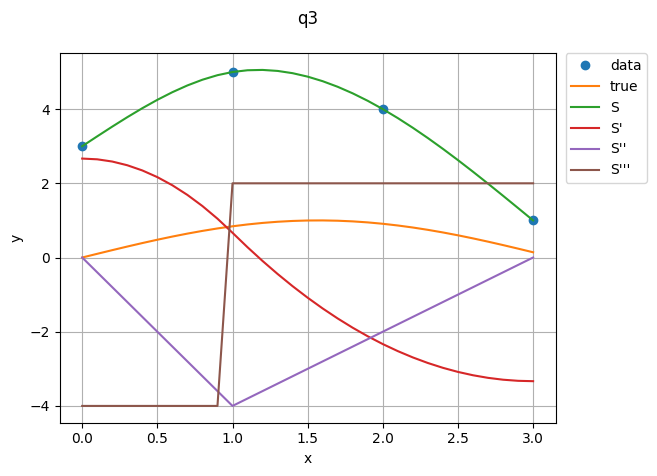

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html

def main():
  x = [0,1,2,3]
  y = [3,5,4,1]
  cs = sp.interpolate.CubicSpline(x,y,bc_type='natural')
  for coeff in cs.c:
      print(coeff)

  xs = np.arange(0,3.1,0.1)

  #plot, data
  plt.plot(x, y, 'o', label='data')
  plt.plot(xs, np.sin(xs), label='true')
  plt.plot(xs, cs(xs), label="S")
  plt.plot(xs, cs(xs, 1), label="S'")
  plt.plot(xs, cs(xs, 2), label="S''")
  plt.plot(xs, cs(xs, 3), label="S'''")

  # plot, set style
  plt.grid()
  plt.title("q3\n")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.ylabel("y")
  plt.xlabel("x")

  # plot, show
  plt.show()

if __name__ == "__main__":
  main()


###### code, long = non-library



spline 1 : 

3.0 + 2.66666667·x + 0.0·x² - 0.66666667·x³

spline 2 : 

            3         2
0.3333 (x-1) - 2 (x-1) + 0.6667 (x-1) + 5

spline 3 : 

            3         2
0.3333 (x-2) - 1 (x-2) - 2.333 (x-2) + 4


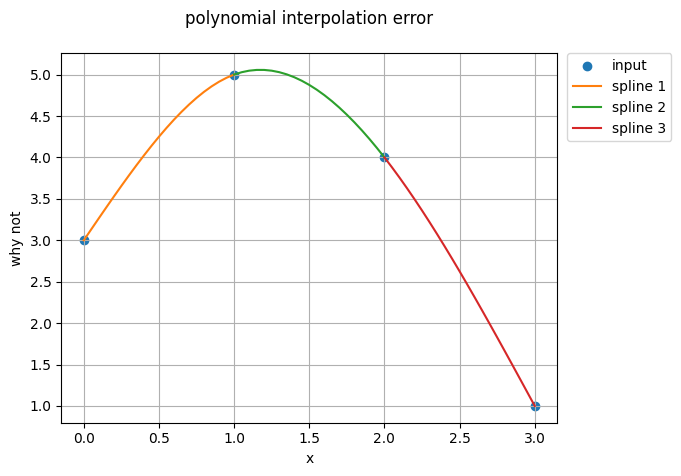

In [ ]:
# bc im even lazier

import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial as npp

def main():
  #input = [[0,3],[1,5],[2,4],[3,1]]
  xs = [0,1,2,3]
  ys = [3,5,4,1]
  n = len(ys) # larger than n-1 bc extra equation

  δ = [] # x[i+1] - x[i]
  Δ = [] # y[i+1] - y[i]
  for i in range(n-1):
    δ.append(xs[i+1]-xs[i])
    Δ.append(ys[i+1]-ys[i])

  lhs = np.zeros((n,n))
  rhs = np.zeros((n))
  lhs[0,0] = 1; lhs[-1,-1] = 1
  for i in range(1,n-1):
    lhs[i,i-1] = δ[i-1]
    lhs[i,i] = 2*(δ[i-1]+δ[i])
    lhs[i,i+1] = δ[i]
    rhs[i] = 3*(Δ[i]/δ[i] - Δ[i-1]/δ[i-1])
  cs = np.linalg.solve(lhs,rhs)

  bs = []
  ds = []
  for i in range(n-1):
    ds.append((cs[i+1]-cs[i])/(3*δ[i]))
    bs.append(Δ[i]/δ[i] - (2*cs[i] + cs[i+1])*δ[i]/3)

  coeffs = []
  ss = []
  for i in range(n-1):
    if xs[i] != 0:
      coeffs.append([ds[i],cs[i],bs[i],ys[i]]) # np.polyId: low to high degree
      ss.append(np.poly1d(coeffs[i],variable ="(x-"+str(xs[i])+")")) # shift
    else:
      coeffs.append([ys[i],bs[i],cs[i],ds[i]]) # npp.Polynomial: high-to-low
      ss.append(npp.Polynomial(coeffs[i]))

  # display component splines
  for i,s in enumerate(ss):
    print(f"\nspline {i+1} : \n\n{s}")

  # plot, data
  plt.scatter(xs,ys,marker="o",label="input")

  for i,s in enumerate(ss):
    xs_i = np.linspace(xs[i],xs[i+1],21)
    if xs[i] != 0:
      ys_i = s(xs_i - xs[i]) # np.polyId, with shift
    else:
      ys_i = s(xs_i) # via npp.Polynomial, without shift
    plt.plot(xs_i,ys_i,c="C"+str(i+1),label="spline "+str(i+1))

  # plot, set style
  plt.grid()
  plt.title(f"polynomial interpolation error\n")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.ylabel("why not")
  plt.xlabel("x")

  # plot, show
  plt.show()

if __name__ == "__main__":
  main()


### q4 (10 pts <font color=GREEN>MATH 385 ONLY</font>) bezier curve.

find the one-piece bezier curve $(x(t),y(t))$ defined by the given four points: $(0,0),(0,2),(2,0),(1,0)$.
</br>


$$x(t) = 6t^2 - 5t^3, y(t) = 6t-12t^2+6t^3$$
</br>


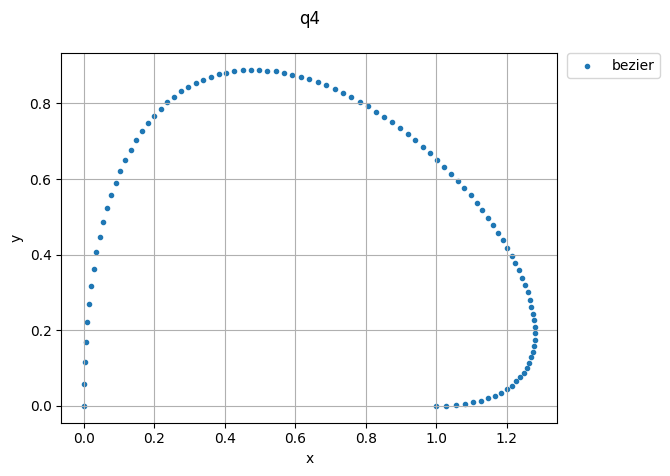

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = lambda t: 6*pow(t,2) - 5*pow(t,3)
y = lambda t: 6*t - 12*pow(t,2) + 6*pow(t,3)

h = 0.01
imax = int(1/h)+1
data = np.zeros((imax,2))
for i in range(imax):
  t = i*h
  data[i,0] = x(t)
  data[i,1] = y(t)

# plot, set data
plt.scatter(data[:,0],data[:,1],c="C0",marker=".",label="bezier")

# plot, set style
plt.grid()
plt.title("q4\n")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("y")
plt.xlabel("x")

# plot, show
plt.show()


### q5 (20 pts) bezier curve <font color=red>didnt use</font>

describe the character drawn by the following two-piece bezier curve:
</br></br>

$$(0,2),(1,2),(1,1),(0,1)$$
$$(0,1),(1,1),(1,0),(0,0)$$
</br>


0.0 + 3.0·x - 3.0·x² + 0.0·x³


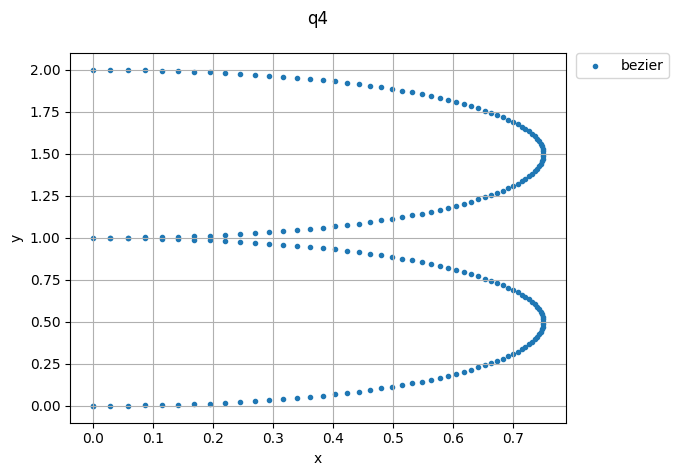

In [ ]:
import matplotlib.pyplot as plt
from numpy import polynomial as npp

bcs = [[[0,2],[1,2],[1,1],[0,1]],[[0,1],[1,1],[1,0],[0,0]]]

xcs = []
ycs = []

for i,bc in enumerate(bcs):
  bx = 3*(bc[1][0] - bc[0][0])
  cx = 3*(bc[2][0] - bc[1][0]) - bx
  dx = bc[3][0] - bc[0][0] - bx - cx
  by = 3*(bc[1][1] - bc[0][1])
  cy = 3*(bc[2][1] - bc[1][1]) - by
  dy = bc[3][1] - bc[0][1] - by - cy
  xcs.append([bc[0][0],bx,cx,dx])
  ycs.append([bc[0][1],by,cy,dy])

p_x1 = npp.Polynomial([xcs[0][0],xcs[0][1],xcs[0][2],xcs[0][3]])
p_x2 = npp.Polynomial([xcs[1][0],xcs[1][1],xcs[1][2],xcs[1][3]])
p_y1 = npp.Polynomial([ycs[0][0],ycs[0][1],ycs[0][2],ycs[0][3]])
p_y2 = npp.Polynomial([ycs[1][0],ycs[1][1],ycs[1][2],ycs[1][3]])

h = 0.01
imax = int(1/h)+1
data = np.zeros((imax*2,2))
for i in range(imax):
  t = i*h
  data[i,0] = p_x1(t)
  data[i,1] = p_y1(t)

for i in range(imax):
  t = i*h
  data[100+i,0] = p_x2(t)
  data[100+i,1] = p_y2(t)

# plot, set data
plt.scatter(data[:,0],data[:,1],c="C0",marker=".",label="bezier")

# plot, set style
plt.grid()
plt.title("q4\n")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("y")
plt.xlabel("x")

# plot, show
plt.show()
